# 🎯 Project Objective:
To develop a machine learning-based model that analyzes student data to monitor, classify, and predict stress levels, aiming to identify key factors influencing student stress and provide actionable insights to improve mental well-being and academic performance.

# Student Stress Monitoring Datasets

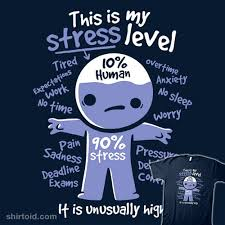

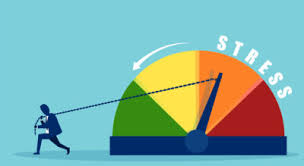

### Step 1: Import Librabies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score#root_mean_squared_error
warnings.filterwarnings('ignore')
print('modules loaded successfully')

modules loaded successfully


In [2]:
#pip install kagglehub

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mdsultanulislamovi/student-stress-monitoring-datasets")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\pankh\.cache\kagglehub\datasets\mdsultanulislamovi\student-stress-monitoring-datasets\versions\1


### Step 2: Load Data 

In [4]:
file_1,file_2=os.listdir(path)
print('done')

done


In [5]:
file_1_path=path+'/'+file_1
file_2_path=path+'/'+file_2

In [6]:
df_sld=pd.read_csv(file_1_path)
df_sd=pd.read_csv(file_2_path)
print('done')

done


### Step3: Understand Data using EDA

In [7]:
df_sld.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [8]:
df_sld.tail()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2
1099,18,6,1,15,3,3,0,3,3,0,...,3,3,4,3,3,1,5,1,4,2


In [9]:
df_sld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [10]:
df_sld.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [11]:
# Checking Null values
df_sld.isna().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [12]:
df_sld.duplicated().sum()

np.int64(0)

In [13]:
df_sld.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

In [14]:
# Shape
df_sld.shape

(1100, 21)

In [15]:
df_sld.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

### DATA VISUALISATION

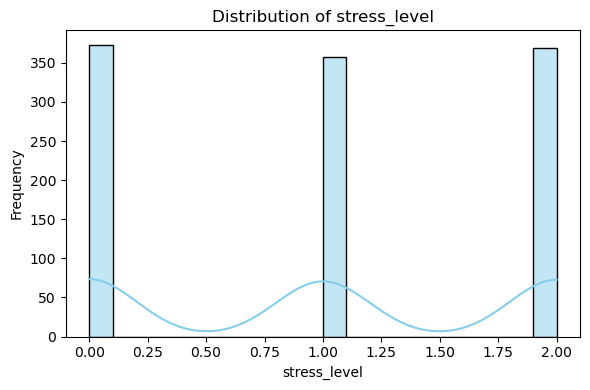

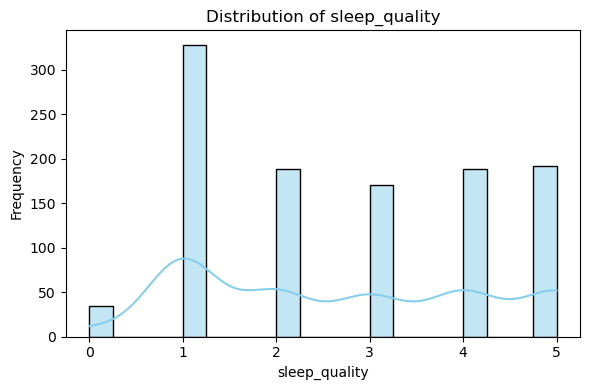

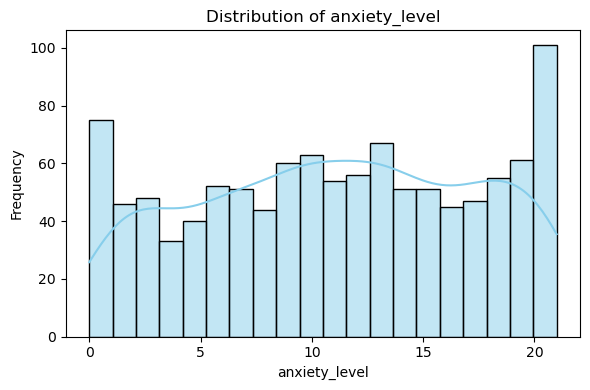

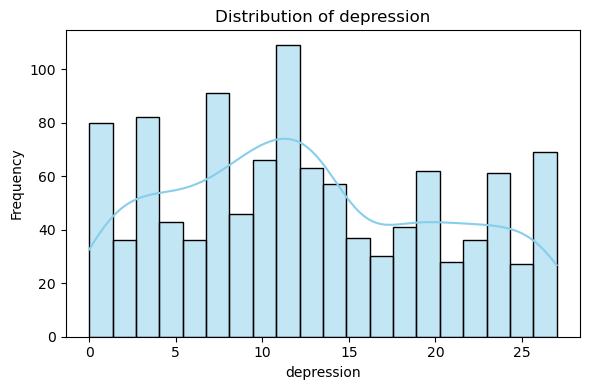

In [93]:
features = ['stress_level', 'sleep_quality', 'anxiety_level', 'depression']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_sld[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout() 
    plt.show()

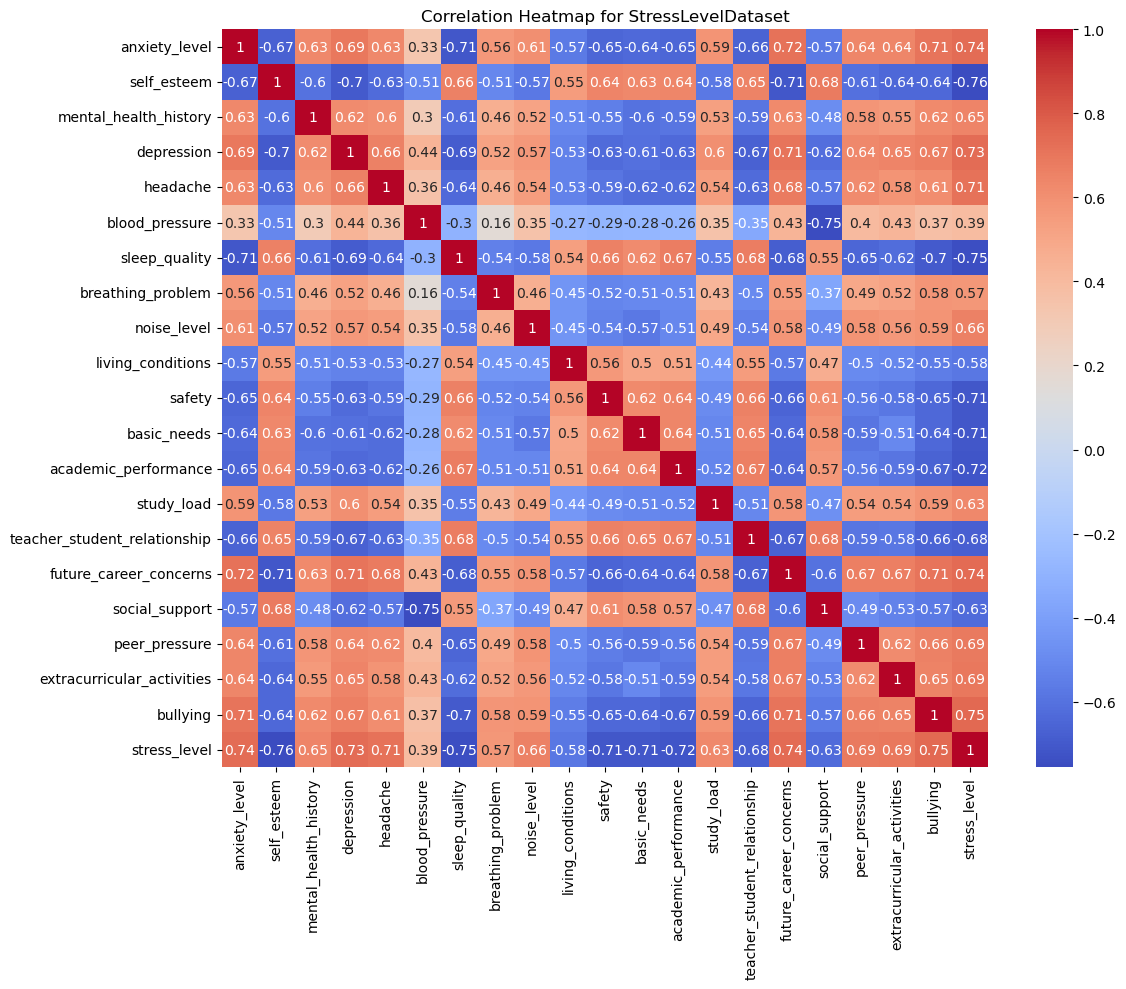

In [95]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_sld.corr(), annot=True, cmap='coolwarm')  # Note the ()
plt.title('Correlation Heatmap for StressLevelDataset')
plt.tight_layout()
plt.show()

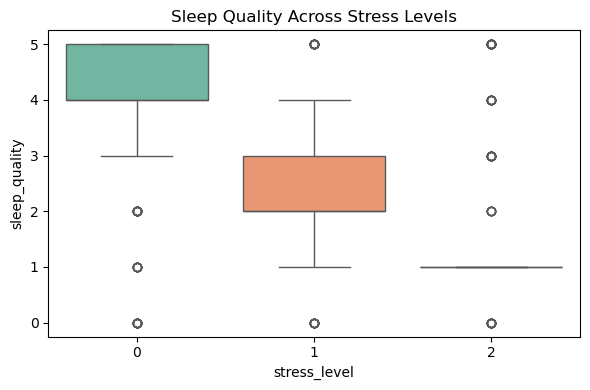

In [97]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='stress_level', y='sleep_quality', data=df_sld, palette='Set2')
plt.title('Sleep Quality Across Stress Levels')
plt.tight_layout()
plt.show()

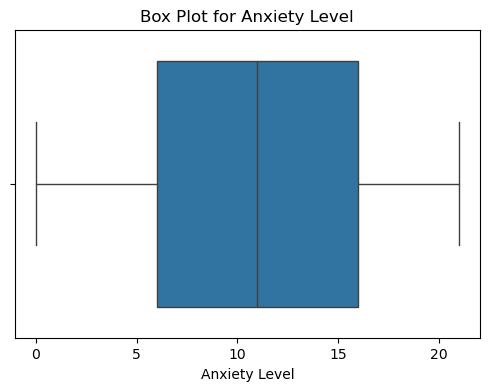

In [99]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_sld['anxiety_level'])
plt.title('Box Plot for Anxiety Level')
plt.xlabel('Anxiety Level')
plt.show()

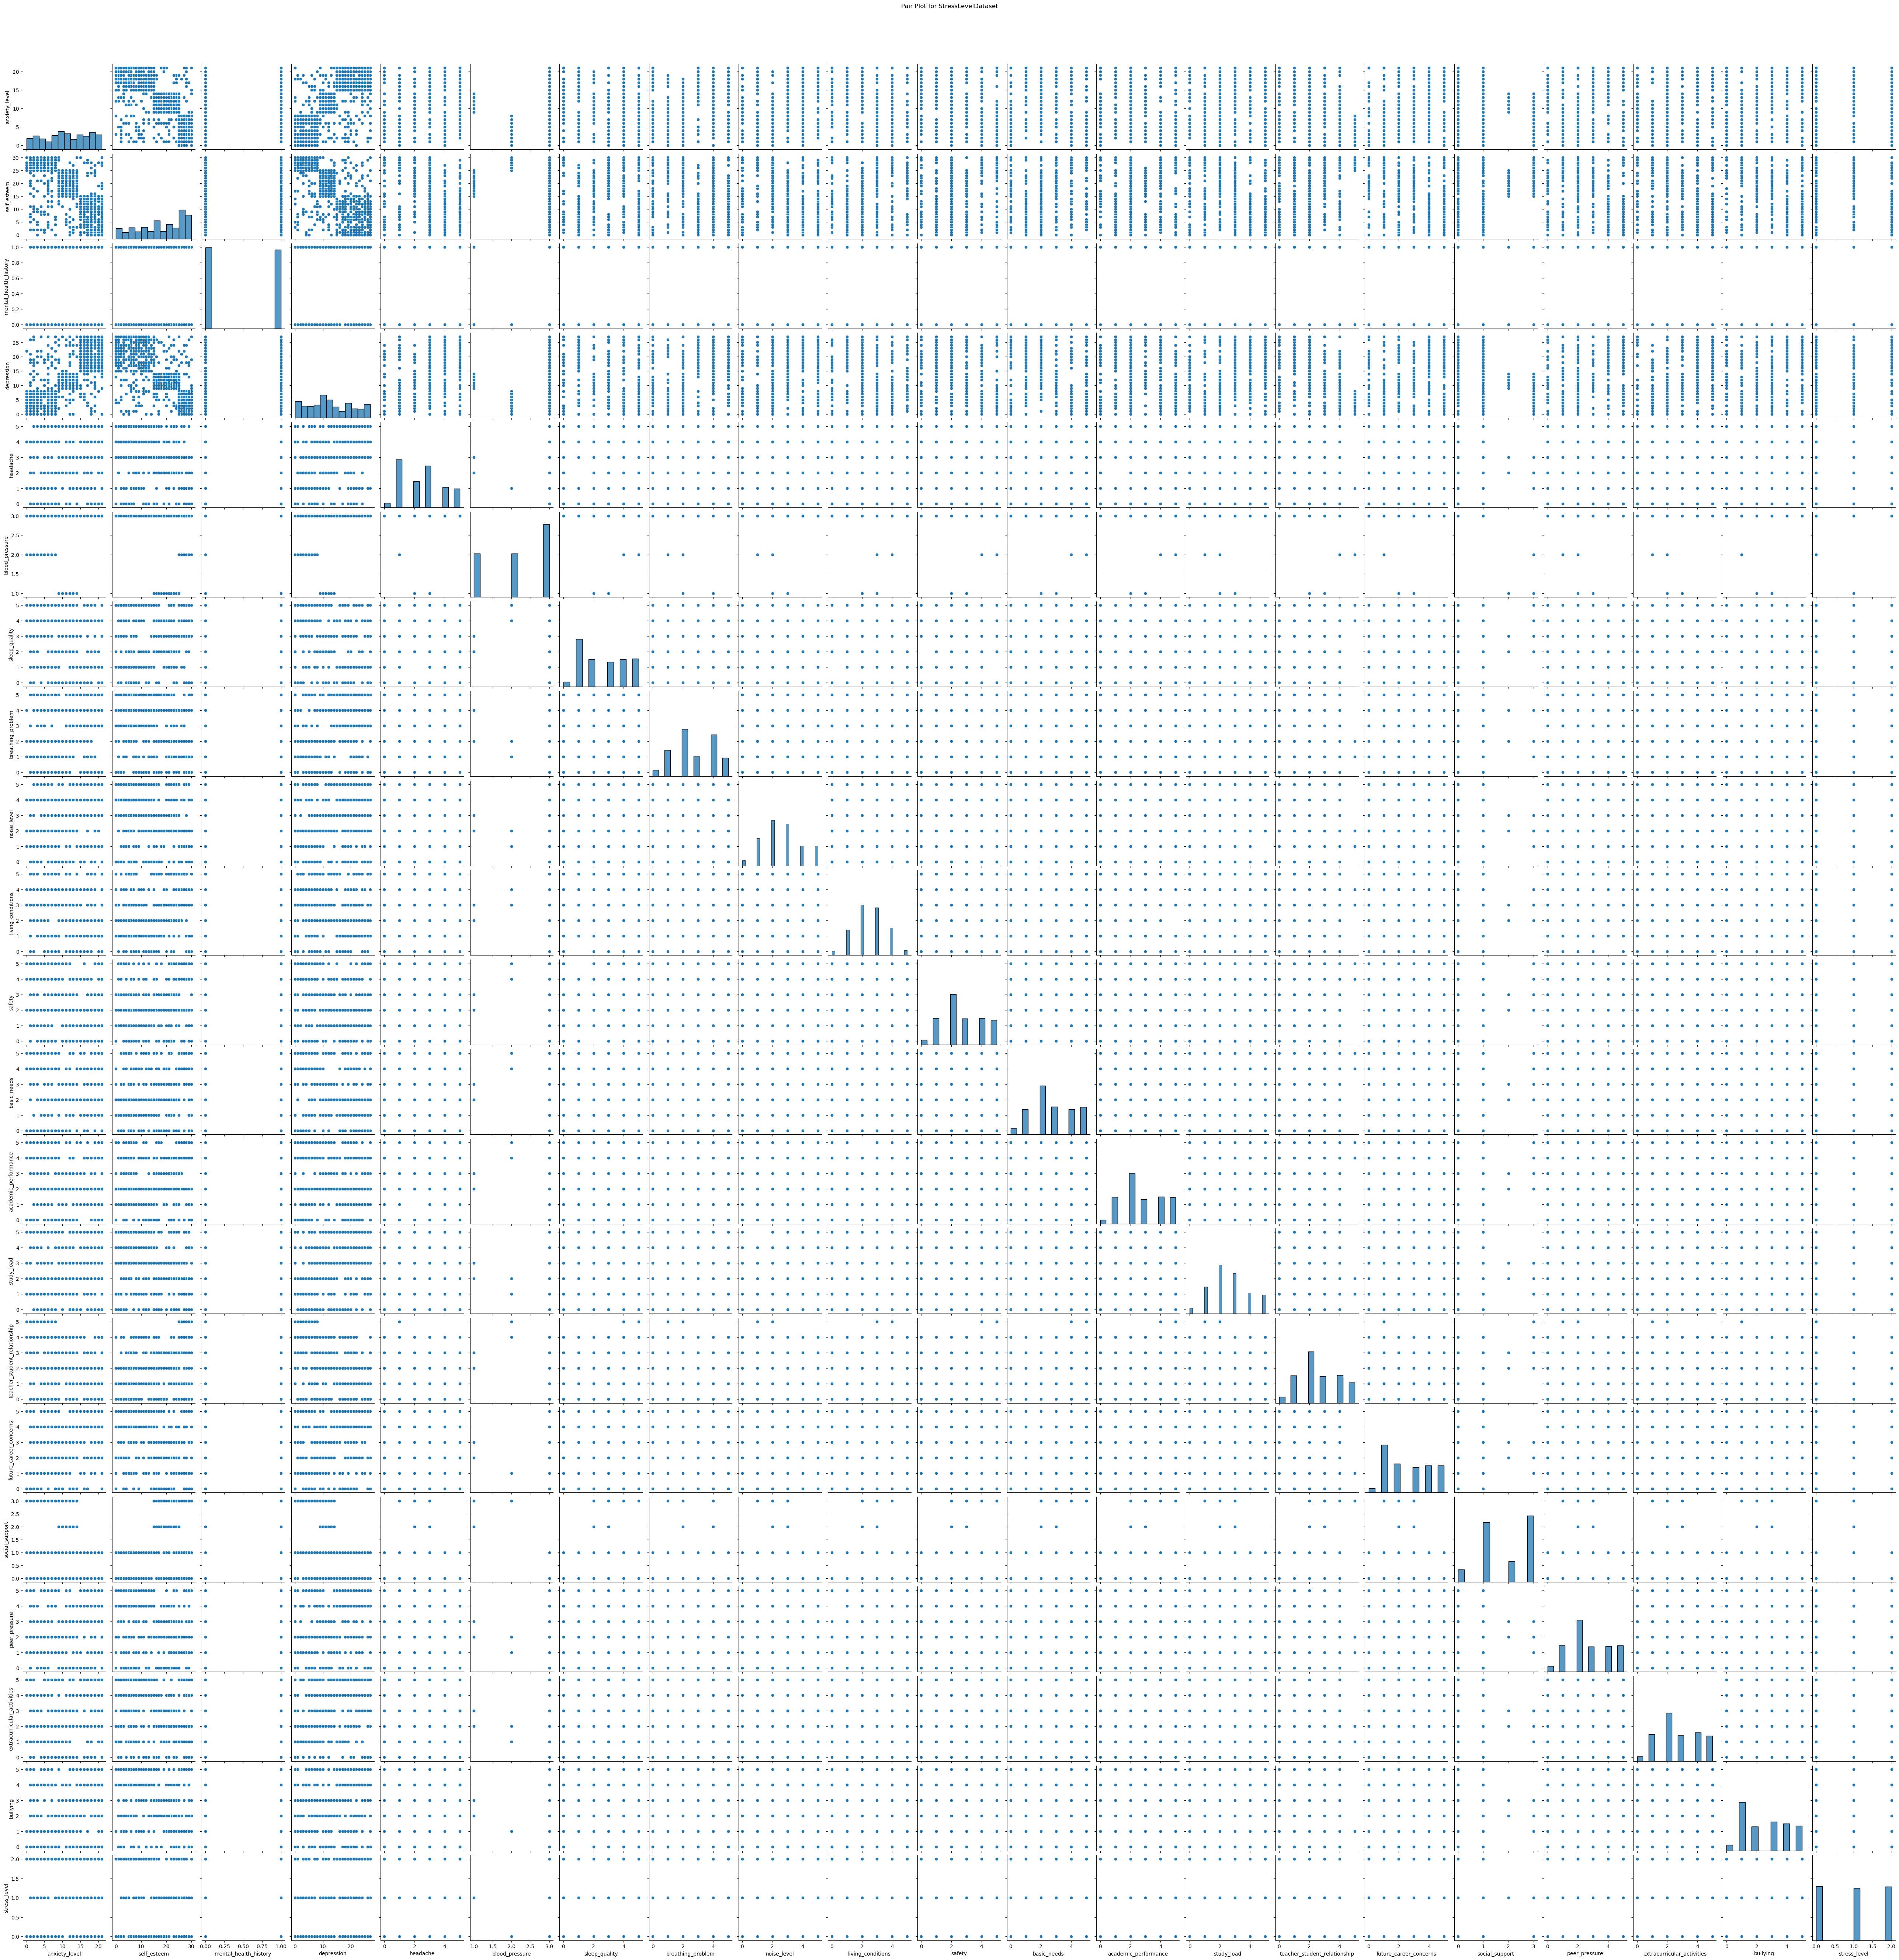

In [102]:
sns.pairplot(df_sld)
plt.suptitle('Pair Plot for StressLevelDataset', y=1.02)
plt.show()

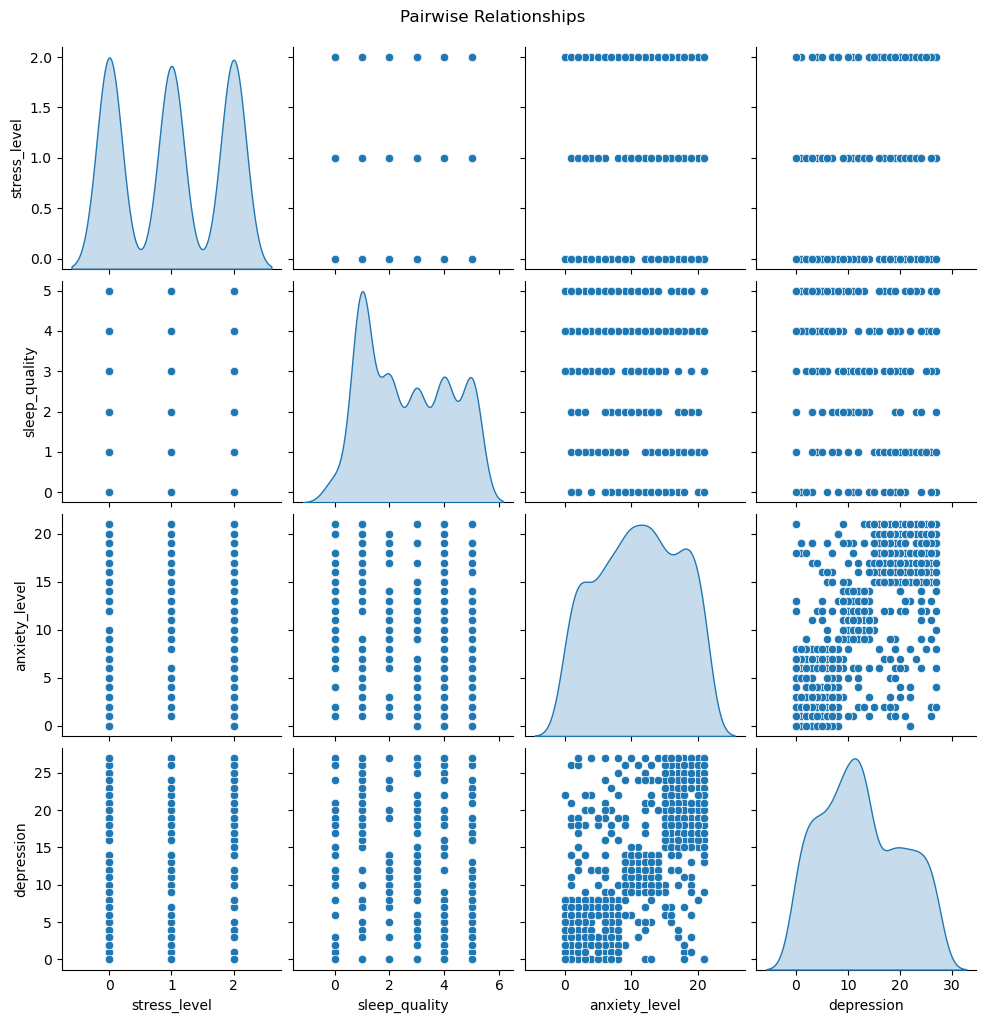

In [104]:
sns.pairplot(df_sld[['stress_level', 'sleep_quality', 'anxiety_level', 'depression']], diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


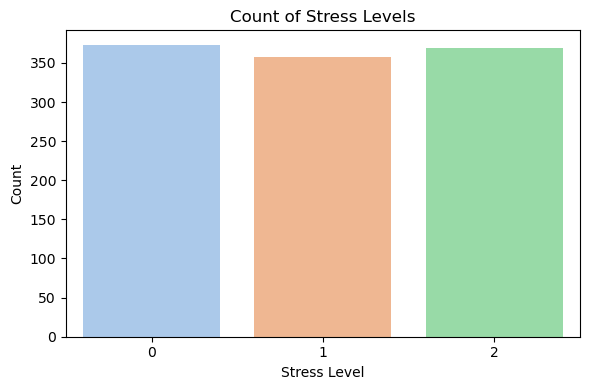

In [106]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stress_level', data=df_sld, palette='pastel')
plt.title('Count of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


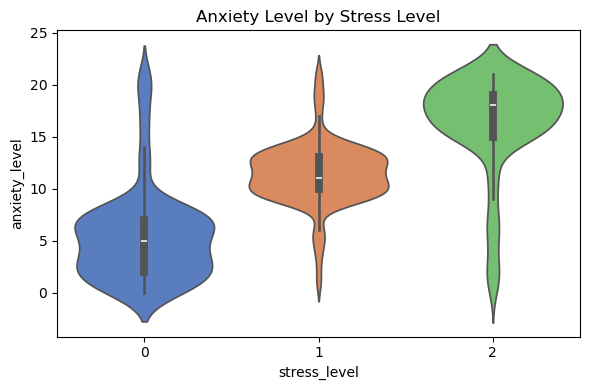

In [108]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='stress_level', y='anxiety_level', data=df_sld, palette='muted')
plt.title('Anxiety Level by Stress Level')
plt.tight_layout()
plt.show()


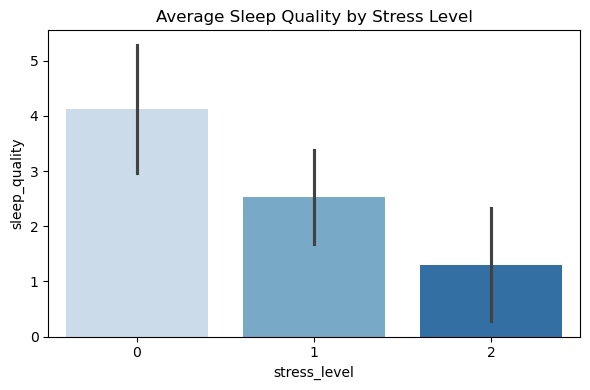

In [110]:
plt.figure(figsize=(6, 4))
sns.barplot(x='stress_level', y='sleep_quality', data=df_sld, ci='sd', palette='Blues')
plt.title('Average Sleep Quality by Stress Level')
plt.tight_layout()
plt.show()


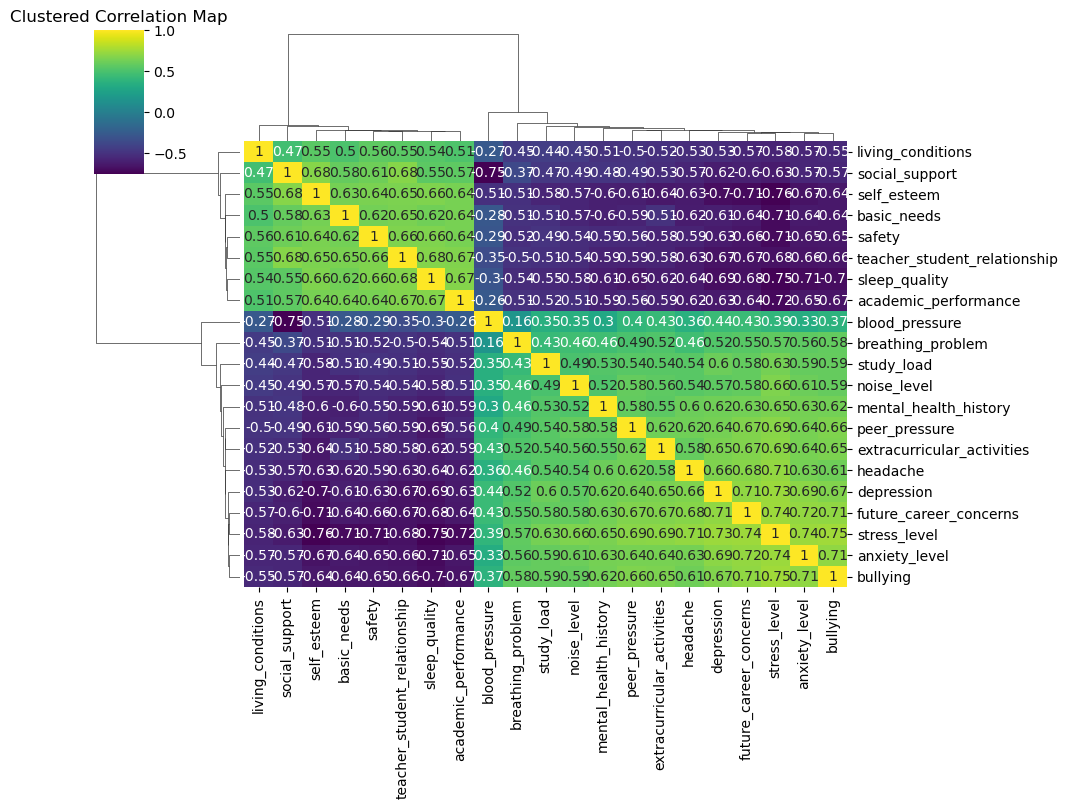

In [112]:
sns.clustermap(df_sld.corr(), annot=True, cmap='viridis', figsize=(10, 8))
plt.title('Clustered Correlation Map')  # Note: clustermap returns a figure, not pyplot
plt.show()


###  Step4 : Train Test Split: Split Data for Training and Testing 

In [26]:
target = 'stress_level'
features = df_sld.columns.drop(target)

X = df_sld[features]
y = df_sld[target]

# Split into training and testing datasets (80/20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print('shape of X train:',X_train.shape)
print('shape of X test:',X_test.shape)
print('shape of y train:',y_train.shape)
print('shape of y test:',y_test.shape)

shape of X train: (880, 20)
shape of X test: (220, 20)
shape of y train: (880,)
shape of y test: (220,)


### Step 5: Model Building

###### Step 5.1: Import Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()#Model Object
model_lr.fit(X_train,y_train)

LogisticRegression()

###### Step 5.1.2: Model Prediction

In [29]:
y_pred=model_lr.predict(X_test)
#y_pred

###### Step 5.1.3: Import Model Evaluation Mterics

In [30]:
#It will be called only when problem is of classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

###### Step 5.1.4: Import Confusion Matrix to Evaluate Classification

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm=confusion_matrix(y_test,y_pred)

In [33]:
print(cm)

[[68  3  5]
 [ 6 62  5]
 [ 5  2 64]]


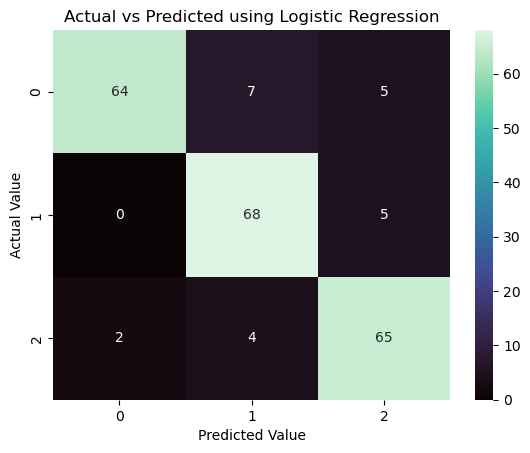

In [119]:
plt.title('Actual vs Predicted using Logistic Regression')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [35]:
cm

array([[68,  3,  5],
       [ 6, 62,  5],
       [ 5,  2, 64]])

In [36]:
cm.ravel()

array([68,  3,  5,  6, 62,  5,  5,  2, 64])

In [37]:
precision_score(y_test,y_pred,average='macro')

0.8836658309547031

In [38]:
accuracy_score(y_test,y_pred)

0.8818181818181818

In [39]:
rs=recall_score(y_test,y_pred,average='macro')
print('Recall Score is :',rs)

Recall Score is : 0.8818201204342131


In [40]:
f1_sc=f1_score(y_test,y_pred,average='macro')
print('F1 Score:',f1_sc)

F1 Score: 0.8819640870808835


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        76
           1       0.93      0.85      0.89        73
           2       0.86      0.90      0.88        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



###### Step 5.1.5: Checking Model Score

In [42]:
#Model Score same as Accuray Score
lr_score=model_lr.score(X_test,y_test)
lr_score

0.8818181818181818

### Step 5.2: Naive Bayes ML Model

###### Step 5.2.1: Import Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

#GaussianNB only be use in case of binary classification 
#MultinomialNB:only be use in case of Multi class classification


model_nv = GaussianNB()

model_nv.fit(X_train,y_train)  # Train part/learning

GaussianNB()

In [44]:
y_pred=model_nv.predict(X_test)

In [45]:
nv_score=model_nv.score(X_test,y_test)
print('Naive Bayes Score:',nv_score)

Naive Bayes Score: 0.9


In [46]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred,average='macro'))
print('Recall Score:',recall_score(y_test,y_pred,average='macro'))
print('F1 Score:',f1_score(y_test,y_pred,average='macro'))

Accuracy Score: 0.9
Precision Score: 0.9083858809886207
Recall Score: 0.9005994631572177
F1 Score: 0.9006452461911372


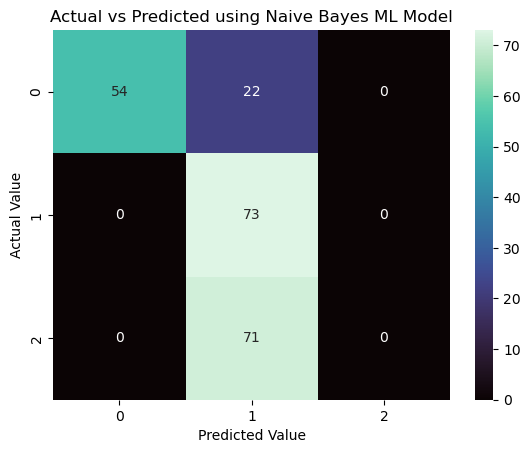

In [121]:
cm=confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        76
           1       0.98      0.85      0.91        73
           2       0.81      0.96      0.88        71

    accuracy                           0.90       220
   macro avg       0.91      0.90      0.90       220
weighted avg       0.91      0.90      0.90       220



### Step 5.3: Support Vector Machine ML Model

###### Step 5.3.1: Import SVM Module

In [49]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(X_train,y_train)

SVC()

###### Step 5.3.2: Predict X_test

In [50]:
y_pred=model_svc.predict(X_test)

###### Step 5.3.3: Checking Scores and Confusion Matrix

In [51]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred,average='macro'))
print('Recall Score:',recall_score(y_test,y_pred,average='macro'))
print('F1 Score:',f1_score(y_test,y_pred,average='macro'))

Accuracy Score: 0.8954545454545455
Precision Score: 0.896368954467546
Recall Score: 0.8959562469747588
F1 Score: 0.8953953953953953


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        76
           1       0.90      0.88      0.89        73
           2       0.86      0.93      0.89        71

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



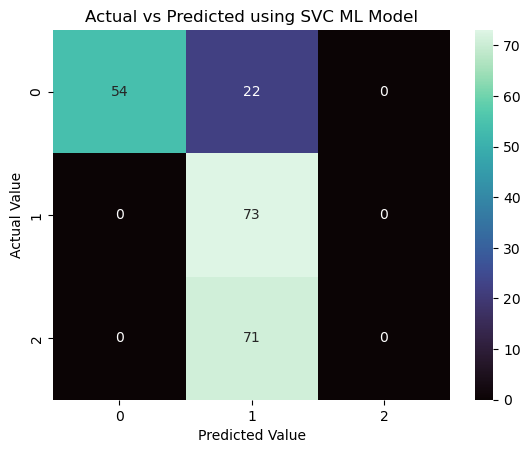

In [123]:
cm=confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using SVC ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [54]:
svm_score=accuracy_score(y_test,y_pred)

In [55]:
lr_score,nv_score,svm_score

(0.8818181818181818, 0.9, 0.8954545454545455)

In [56]:
model_svc.score(X_test,y_test)

0.8954545454545455

### Step 5.4: Decision Tree ML Model

###### Step 5.4.1: Import Decision Tree Model

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

###### Step 5.4.2: Predict y_pred

In [59]:
y_pred= model_dt.predict(X_test)

In [60]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred,average='macro'))
print('Recall Score:',recall_score(y_test,y_pred,average='macro'))
print('F1 Score:',f1_score(y_test,y_pred,average='macro'))

Accuracy Score: 0.8954545454545455
Precision Score: 0.8959562006620829
Recall Score: 0.8950812541676397
F1 Score: 0.8953130023802899


In [61]:
df_sld.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [62]:
dt_score=accuracy_score(y_test,y_pred)
dt_score

0.8954545454545455

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90        76
           1       0.88      0.90      0.89        73
           2       0.91      0.87      0.89        71

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



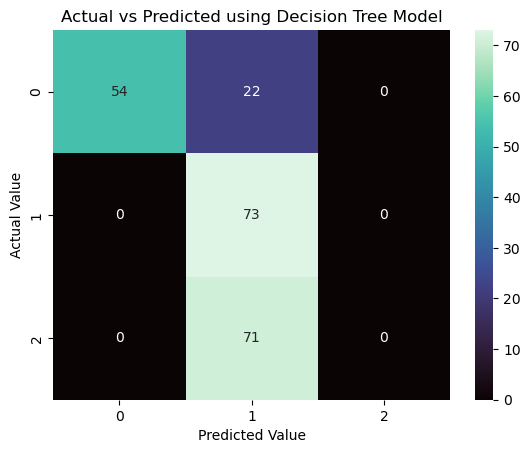

In [125]:
cm=confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using Decision Tree Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Step 5.5: Ensemble ML Model

###### Step 5.5.1: Bagging Technique Model>> Random Forest ML Model 

###### Step 5.5.2: Import Random Forest Model

In [65]:
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier(n_estimators=200)#parameter change Default Tree 100 to 200
model_rf.fit(X_train,y_train)#Learning

RandomForestClassifier(n_estimators=200)

###### Step 5.5.3: y_pred Prediction based on X_test

In [66]:
y_pred=model_rf.predict(X_test)

In [67]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred,average='macro'))
print('Recall Score:',recall_score(y_test,y_pred,average='macro'))
print('F1 Score:',f1_score(y_test,y_pred,average='macro'))

Accuracy Score: 0.8772727272727273
Precision Score: 0.8773642820903095
Recall Score: 0.8773571493851356
F1 Score: 0.877278340226502


In [68]:
rf_score=accuracy_score(y_test,y_pred)
rf_score

0.8772727272727273

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        76
           1       0.90      0.89      0.90        73
           2       0.85      0.87      0.86        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



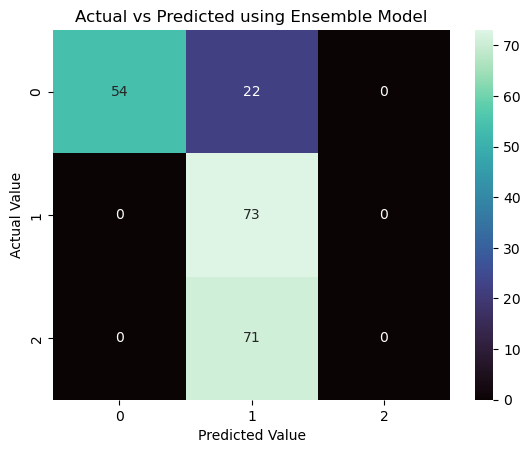

In [130]:
cm=confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using Ensemble Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Step 5.6 Ensemble Boosting Technique: Adaboost, Gradientboost, XGboost
- Adaboost: Adaptive Boosting
- Gradientboost:GBM
- LBM:Gradientboost: LGBM(Light Gradient Bossting Model)
- XGBoost:Extreme Gradient Boosting:
- Catboost: Categorical : Texual Data

###### Step 5.6.1: Import XGboost ML Algorithm

In [70]:
#pip install xgboost

In [71]:
import xgboost
print('done')

done


In [72]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()#Hyperparameter : Models Fine Tune objective='binary:Logistic' , random_state=42, Learning_rate=0.001
model_xgb.fit(X_train,y_train)#NONE:Hyper Parameter: /Model Fine Tune

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [73]:
y_pred=model_xgb.predict(X_test)

In [74]:
xgb_score=accuracy_score(y_test,y_pred)
xgb_score

0.8681818181818182

### Step 5.7: KNN: Regression and Classification

###### Step 5.7.1: Import KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
model_knn= KNeighborsClassifier(n_neighbors=14)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [77]:
y_pred=model_knn.predict(X_test)

In [78]:
knn_score=accuracy_score(y_test,y_pred)
knn_score

0.8954545454545455

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        76
           1       0.86      0.93      0.89        73
           2       0.87      0.92      0.89        71

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



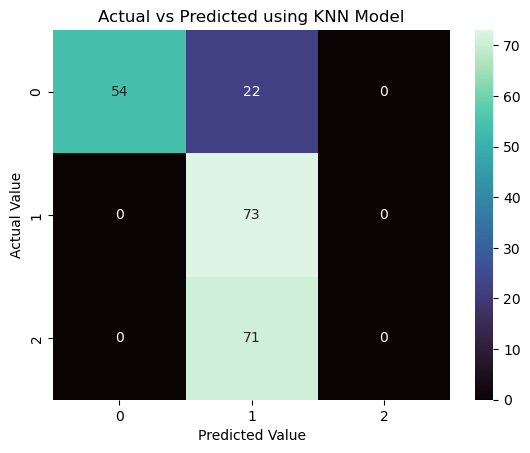

In [133]:
cm=confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using KNN Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Step 5.8: Artificial Neural Network using Deep Learning

In [81]:
#pip install keras

In [82]:
#pip install tensorflow

###### Step 5.8.1: ANN Model Creation

In [83]:
from keras.models import Sequential
from keras.layers import Dense

###### Step 5.8.2: Model Building

In [84]:
#X_train.shape

In [85]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=20))#Dense 1
model.add(Dense(1,activation='sigmoid'))#output will be Nueron for binary 
model.compile(loss='binary_crossentropy',#loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])# metrics return accuracy score
print('done')

done


###### Step 5.8.3: Model Training

In [86]:
model.fit(X_train,y_train,epochs=300)#iteration during retraining epochs=300

Epoch 1/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3261 - loss: -1.2102
Epoch 2/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4364 - loss: -2.3857 
Epoch 3/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5182 - loss: -3.3411  
Epoch 4/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5159 - loss: -4.5817  
Epoch 5/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5125 - loss: -6.6709 
Epoch 6/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4977 - loss: -8.9779  
Epoch 7/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5136 - loss: -11.4468 
Epoch 8/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5080 - loss: -14.2120  
Epoch 9/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5102 - loss: -17.1963  
Epoch 10/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5205 - loss: -20.4534  
Epoch 11/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5080 - loss: -23.9154  
Epoch 12/300
28/28 ━━━━━━━━━━━

###### Step 5.8.4: pred y_value

In [87]:
y_pred=model.predict(X_test)
y_pred=[round(i[0])for i in y_pred ]
print(y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [88]:
ann_score=accuracy_score(y_test,y_pred)
ann_score

0.5772727272727273

### Step 6: All Model Comparison

In [89]:
all_model_score=[lr_score,nv_score,svm_score,dt_score,rf_score,xgb_score,knn_score,ann_score]

model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','XGB','Knn','ANN']

print('Done')

Done


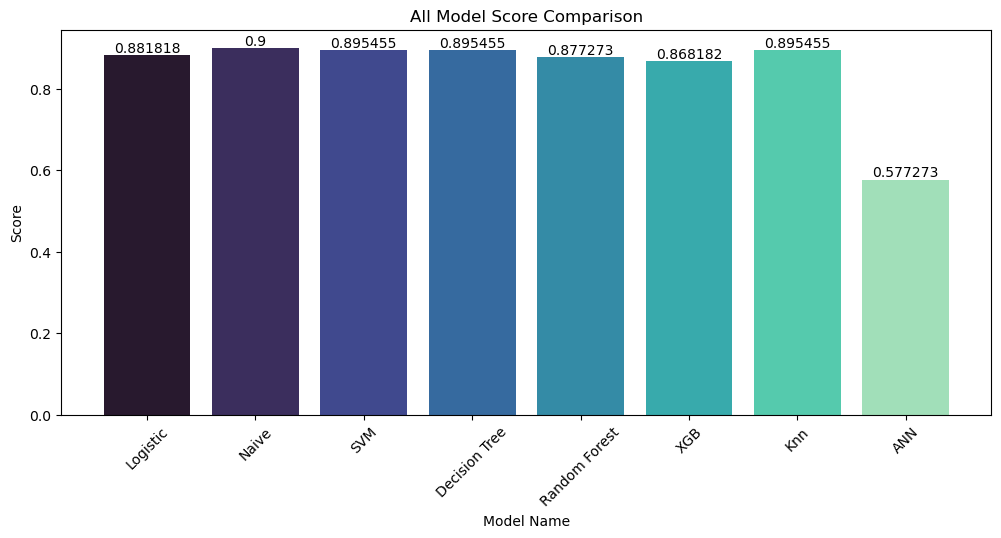

In [114]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

### Step 7: Best Model Save¶

In [91]:
import pickle
with open('stud_stress_monitoring.pkl','wb') as f:
    pickle.dump(model_lr,f)
print('done')

done


In [92]:
import os
ssm=os.getcwd()
print(ssm)

C:\Users\pankh\Student Stress Monitoring Project
